In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools as it
import matplotlib.gridspec as gridspec
import scipy as sp

from scipy.spatial.distance import euclidean
from datetime import datetime

%matplotlib inline

In [2]:
experiment_start = datetime(2015, 12, 23, 14, 48, 0)
experiment_end = datetime(2015, 12, 23, 16, 16, 59)

In [3]:
data_columns = ['tracker_id', 'dB', 'year', 'month', 'day', 'hour', 'minute', 'second']

def as_datetime(x):
    return datetime(x.year, x.month, x.day, x.hour, x.minute, x.second)

def read_data(handle):
    
    df = pd.read_csv(handle, header=None)
    df.columns = data_columns
    df['date'] = df.apply(lambda x:as_datetime(x), axis=1)
    df = df[(df['date'] >= experiment_start) & (df['date'] <= experiment_end)]
    return df

def get_id(head, tail):
    """
    Head: the first two letters of the tracker ID.
    Tail: the last two letters of the tracker ID.
    
    Both must be strings.
    """
    
    for t in list(tracker_ids):
        header = t.split(':')[0]
        tailer = t.split(':')[-1]
        
        if header == head and tailer == tail:
            return t
            break

bt1 = read_data('bt1.csv')
bt2 = read_data('bt2.csv')
bt3 = read_data('bt3.csv')
bt4 = read_data('bt4.csv')
bt5 = read_data('bt5.csv')
bt6 = read_data('bt6.csv')

print(len(bt1), len(bt2), len(bt3), len(bt4), len(bt5), len(bt6))

643 1480 1107 1890 1705 1573


In [4]:
tracker_ids = set().union(bt1.tracker_id).union(bt2.tracker_id).union(bt3.tracker_id).union(bt4.tracker_id).union(bt5.tracker_id).union(bt6.tracker_id)
tracker_ids, len(tracker_ids)

({'68:9E:19:11:8E:FD',
  '68:9E:19:11:A3:03',
  '68:9E:19:11:A6:DB',
  'F4:B8:5E:C4:56:22',
  'F4:B8:5E:C4:5F:8C',
  'F4:B8:5E:C4:68:37',
  'F4:B8:5E:C4:8F:EE',
  'F4:B8:5E:DC:B5:DD',
  'F4:B8:5E:DD:42:D2',
  'F4:B8:5E:DD:47:06',
  'F4:B8:5E:DD:47:1B'},
 11)

In [5]:
coords = dict()
coords['BT1'] = (49, 0) # x, y
coords['BT2'] = (-49, 0)
coords['BT3'] = (0, 49)
coords['BT4'] = (0, -1) # at x=0, y=-1
coords['BT5'] = (0, -1)
coords['BT6'] = (0, -1)

coords[get_id('F4', '06')] = (0, 0)
coords[get_id('F4', '37')] = (6, 0)
coords[get_id('68', 'DB')] = (12, 0)
coords[get_id('F4', '8C')] = (24, 0)
coords[get_id('F4', '22')] = (48, 0)
coords[get_id('F4', '1B')] = (0, 12)
coords[get_id('F4', 'EE')] = (0, 24)
coords[get_id('68', '03')] = (0, 36)
coords[get_id('68', 'FD')] = (0, 48)

In [6]:
bt1_ids = set(bt1.tracker_id)
bt1_ids

{'68:9E:19:11:A6:DB',
 'F4:B8:5E:C4:56:22',
 'F4:B8:5E:C4:5F:8C',
 'F4:B8:5E:C4:68:37',
 'F4:B8:5E:C4:8F:EE',
 'F4:B8:5E:DC:B5:DD',
 'F4:B8:5E:DD:42:D2',
 'F4:B8:5E:DD:47:06',
 'F4:B8:5E:DD:47:1B'}

## Plot Signal vs. Distance

/home/ericmjl/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


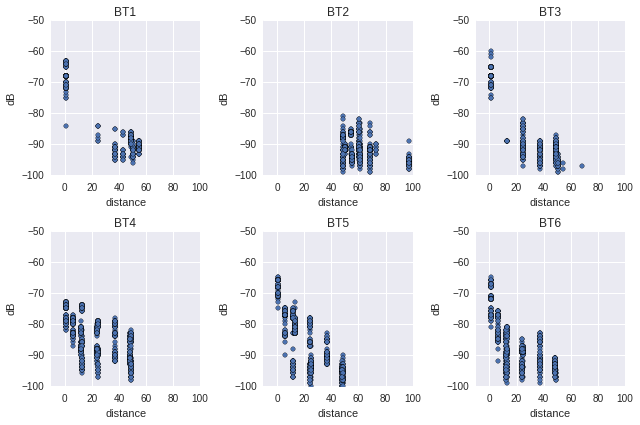

In [7]:
fig = plt.figure(figsize=(9,6))
gs = gridspec.GridSpec(2,3)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])

axes = fig.get_axes()

bt1['distance'] = bt1.apply(lambda x: euclidean(coords['BT1'], coords[x.tracker_id]) if x.tracker_id in coords.keys() else None, axis=1)
bt2['distance'] = bt2.apply(lambda x: euclidean(coords['BT2'], coords[x.tracker_id]) if x.tracker_id in coords.keys() else None, axis=1)
bt3['distance'] = bt3.apply(lambda x: euclidean(coords['BT3'], coords[x.tracker_id]) if x.tracker_id in coords.keys() else None, axis=1)
bt4['distance'] = bt4.apply(lambda x: euclidean(coords['BT4'], coords[x.tracker_id]) if x.tracker_id in coords.keys() else None, axis=1)
bt5['distance'] = bt5.apply(lambda x: euclidean(coords['BT5'], coords[x.tracker_id]) if x.tracker_id in coords.keys() else None, axis=1)
bt6['distance'] = bt6.apply(lambda x: euclidean(coords['BT6'], coords[x.tracker_id]) if x.tracker_id in coords.keys() else None, axis=1)

bt1.dropna().plot(x='distance', y='dB', kind='scatter', title='BT1', ax=ax1)
bt2.dropna().plot(x='distance', y='dB', kind='scatter', title='BT2', ax=ax2)
bt3.dropna().plot(x='distance', y='dB', kind='scatter', title='BT3', ax=ax3)
bt4.dropna().plot(x='distance', y='dB', kind='scatter', title='BT4', ax=ax4)
bt5.dropna().plot(x='distance', y='dB', kind='scatter', title='BT5', ax=ax5)
bt6.dropna().plot(x='distance', y='dB', kind='scatter', title='BT6', ax=ax6)

for ax in axes:
    ax.set_xlim(-10, 100)
    ax.set_ylim(-100, -50)
plt.tight_layout()

# Signal over Time

/home/ericmjl/anaconda3/lib/python3.4/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735955.618218, right=735955.618218
  'left=%s, right=%s') % (left, right))


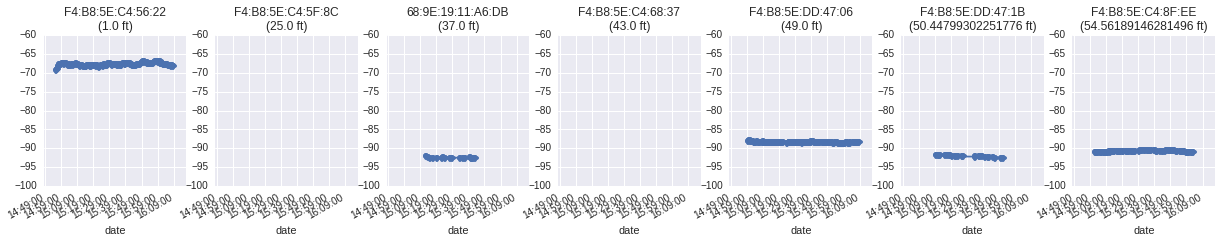

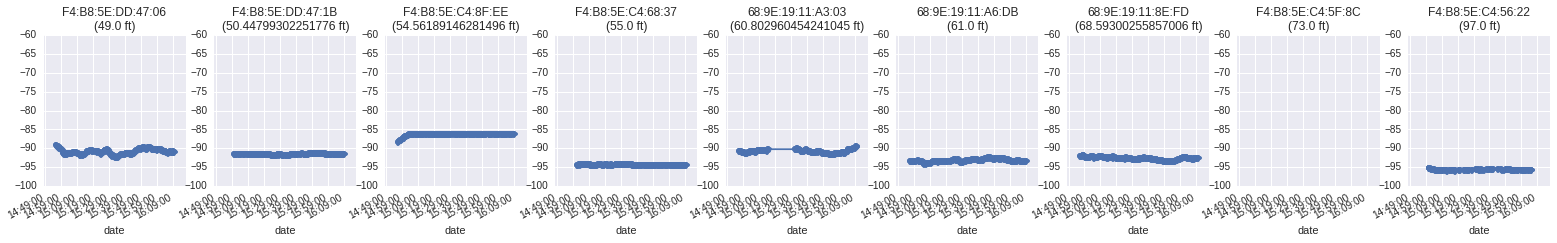

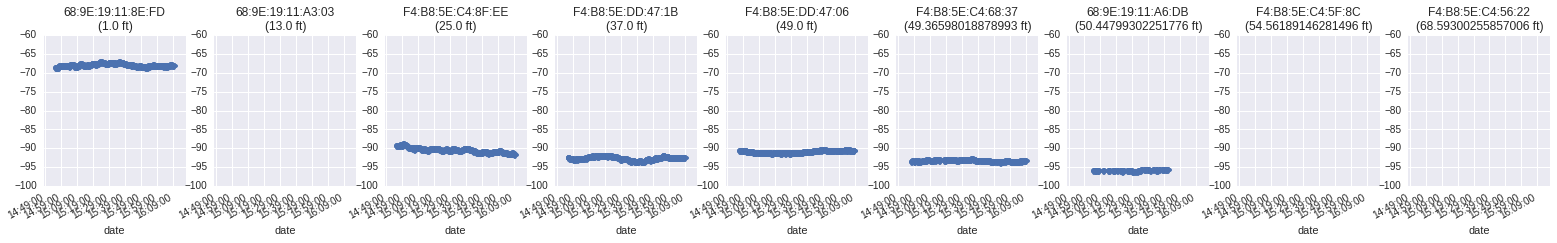

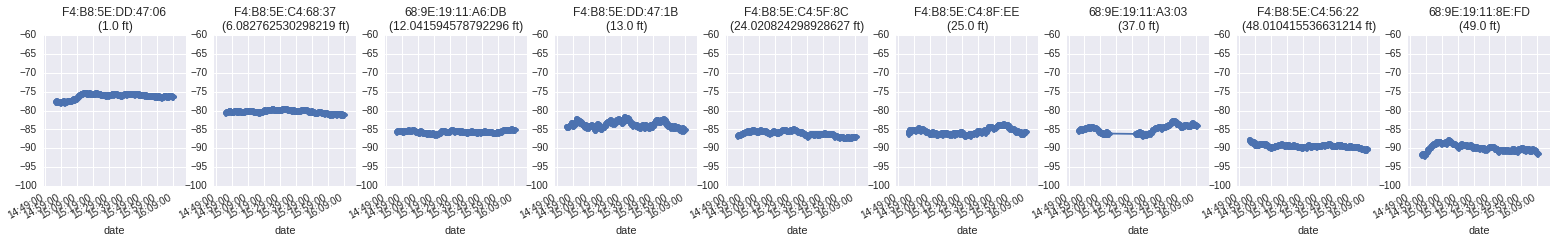

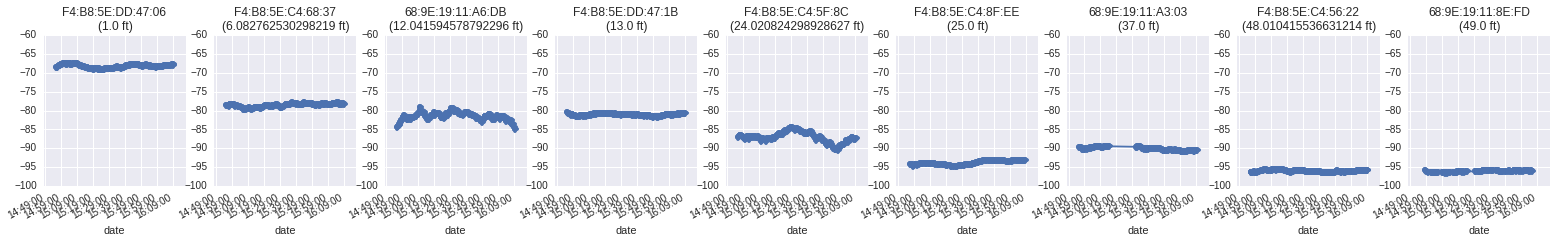

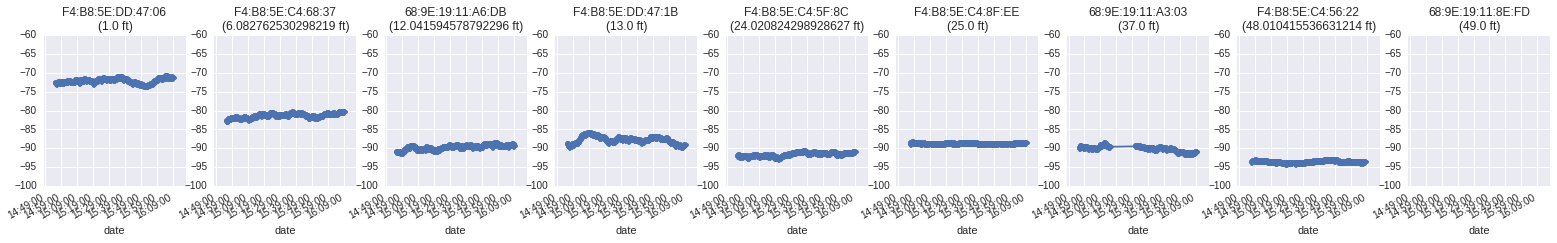

In [8]:
def plot_rolling_average_signal_vs_time(df, name, window=30):
    """
    df: the dataframe containing the data
    name: the name of the base station. should match.
    """
    tracker_ids = sorted([x for x in set(df.tracker_id) if x in coords.keys()], key=lambda x:euclidean(coords[name], coords[x]))

    figheight = 3
    figwidth = 3 * len(tracker_ids)

    fig = plt.figure(figsize=(figwidth, figheight))
    gs = gridspec.GridSpec(1, len(tracker_ids))

    for i, t in enumerate(tracker_ids):
        ax = fig.add_subplot(gs[0, i])
        distance = euclidean(coords[name], coords[t])
        pd.rolling_mean(df[df.tracker_id == t].set_index('date')['dB'], window=window, center=True)\
            .plot(marker='o', ax=ax, title='{1}\n({0} ft)'.format(distance, t))

    for ax in fig.get_axes():
        ax.set_xlim(experiment_start, experiment_end)
        ax.set_ylim(-100, -60)
        
bts = [(bt1, 'BT1'),
       (bt2, 'BT2'),
       (bt3, 'BT3'),
       (bt4, 'BT4'),
       (bt5, 'BT5'),
       (bt6, 'BT6')]

for (df, name) in bts:
    plot_rolling_average_signal_vs_time(df, name)
    plt.savefig('plots/{0}rolling_avg_signal_vs_time.pdf'.format(name), bbox_inches='tight')
# plot_rolling_average_signal_vs_time(bt1, 'BT1')
# plot_rolling_average_signal_vs_time(bt2, 'BT2')
# plot_rolling_average_signal_vs_time(bt3, 'BT3')
# plot_rolling_average_signal_vs_time(bt4, 'BT4')
# plot_rolling_average_signal_vs_time(bt5, 'BT5')
# plot_rolling_average_signal_vs_time(bt6, 'BT6')

# Signal (dB) of mobile trackers

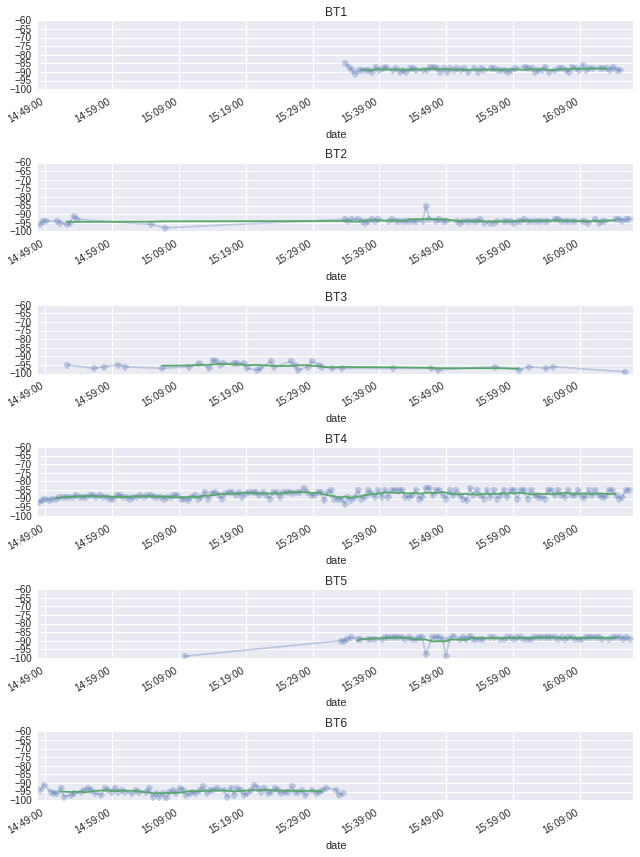

In [9]:
id1 = get_id('F4', 'D2')
# mobile1 = pd.DataFrame()
# mobile1['BT1'] = bt1[bt1.tracker_id == id1].set_index('date')['dB']
# mobile1['BT2'] = bt2[bt2.tracker_id == id1].set_index('date')['dB']
# mobile1

def plot_rolling_mean_mobile_trackers(tracker_id):
    fig = plt.figure(figsize=(9,12))
    gs = gridspec.GridSpec(6,1)
    
    for i, df in enumerate([bt1, bt2, bt3, bt4, bt5, bt6]):    
        ax = fig.add_subplot(gs[i, 0])
        # plot actual data
        df[df.tracker_id == tracker_id].set_index('date')['dB'].plot(ax=ax, marker='o', alpha=0.3)
        # plot rolling mean
        pd.rolling_mean(df[df.tracker_id == tracker_id].set_index('date')['dB'], window=10, center=True).plot(ax=ax)
        ax.set_title('BT{0}'.format(i+1))
        
    for ax in fig.get_axes():
        ax.set_ylim(-100, -60)
        ax.set_xlim(experiment_start, experiment_end)
    plt.tight_layout()
        
plot_rolling_mean_mobile_trackers(id1)

/home/ericmjl/anaconda3/lib/python3.4/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735955.648542, right=735955.648542
  'left=%s, right=%s') % (left, right))


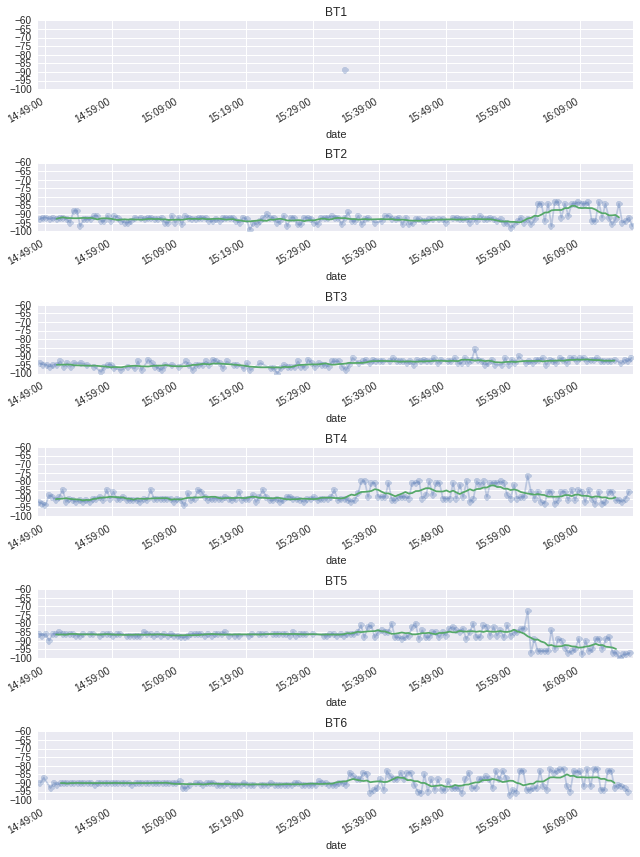

In [10]:
id2 = get_id('F4', 'DD')
plot_rolling_mean_mobile_trackers(id2)

# Resampled dBm every 3 min.

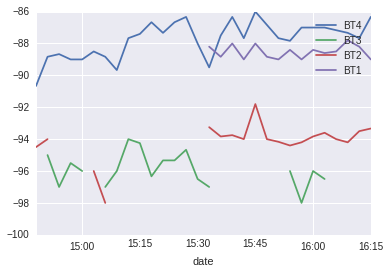

In [11]:
bt4[bt4.tracker_id == id1].set_index('date')['dB'].resample('3T').plot(label='BT4')
bt3[bt3.tracker_id == id1].set_index('date')['dB'].resample('3T').plot(label='BT3')
bt2[bt2.tracker_id == id1].set_index('date')['dB'].resample('3T').plot(label='BT2')
bt1[bt1.tracker_id == id1].set_index('date')['dB'].resample('3T').plot(label='BT1')
plt.legend()

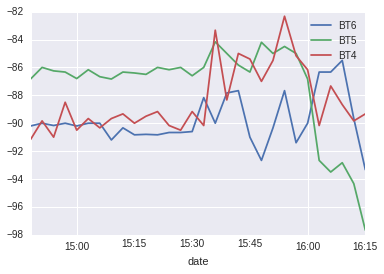

In [12]:
bt6[bt6.tracker_id == id2].set_index('date')['dB'].resample('3T').plot(label='BT6')
bt5[bt5.tracker_id == id2].set_index('date')['dB'].resample('3T').plot(label='BT5')
bt4[bt4.tracker_id == id2].set_index('date')['dB'].resample('3T').plot(label='BT4')
#bt3[bt3.tracker_id == id2].set_index('date')['dB'].resample('3T').plot(label='BT3')
#bt2[bt2.tracker_id == id2].set_index('date')['dB'].resample('3T').plot(label='BT2')
#bt1[bt1.tracker_id == id2].set_index('date')['dB'].resample('3T').plot(label='BT1')
plt.legend()

In [13]:
combined = bt1.append(bt2).append(bt3).append(bt4).append(bt5).append(bt6)
# combined['dB'] = -combined['dB']
combined['power'] = combined['dB'].apply(lambda x: 10 ** (x/10))
# set(combined['distance'].dropna().values)

In [25]:
# distance = combined.groupby('distance')['dB'].describe().unstack().index
# dB = combined.groupby('distance')['dB'].describe().unstack()['mean'].values
# print(distance)
# print(dB)

distance = combined.sort_values('distance').dropna()['distance']
distance_log = combined.sort_values('distance').dropna()['distance'].apply(np.log10)
dB = combined.sort_values('distance').dropna()['dB']
power = combined.sort_values('distance').dropna()['power']

In [123]:
def paper_func(d, n, A):
    """
    Reference: http://www.rn.inf.tu-dresden.de/dargie/papers/icwcuca.pdf
    """
    return - (10 * n) * np.log10(d) - A

func = paper_func

opt_parms, parm_cov = sp.optimize.curve_fit(func, xdata=distance, ydata=dB)
opt_parms# , parm_cov

array([  1.23398527,  70.92215058])

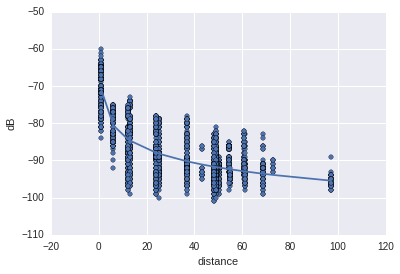

In [124]:
combined.dropna().plot(x='distance', y='dB', kind='scatter')
plt.plot(distance, func(distance, *opt_parms))

In [28]:
# combined.groupby('distance')['power'].describe().unstack()

In [159]:
import pymc3 as pm
from theano import tensor

with pm.Model() as model:
    
    n = pm.Normal('n', mu=1, sd=1)
    A = pm.Normal('A', mu=70, sd=1)
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1.)
    
    likelihood = pm.Normal('dB', 
                           mu=inverse_func(combined.dropna()['dB'], n, A),
                           sd=sigma,
                           observed=combined.dropna()['power'])

In [160]:
with model:
    start = {'A':70, 'n':1}
    step = pm.HamiltonianMC()
    trace = pm.sample(10000, step, start=start)

 [-----------------100%-----------------] 10000 of 10000 complete in 125.2 sec

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ddc746048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6ddc583630>]], dtype=object)

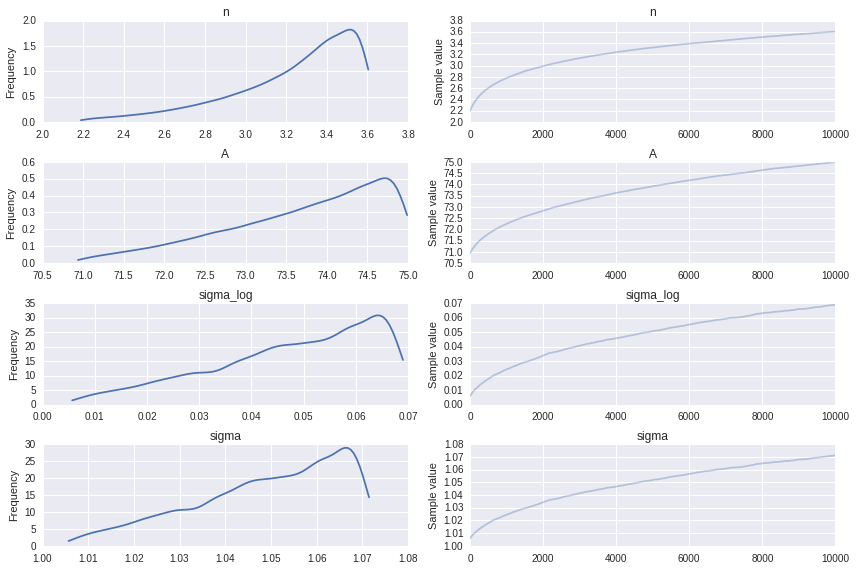

In [161]:
pm.traceplot(trace)

In [116]:
# trace[2000]

# Inverse Function

In [205]:
def inverse_func(rssi, n, A):
    """
    Inverse of paper_func
    """
    exponent = -(A + rssi) / (10 * n)
    return np.power(10, exponent)

def constraints(d):
    if d > 96:
        return 96
    elif d < 1:
        return 1
    else:
        return d

def constrained_inverse_func(rssi, n, A):
    """
    Constrain distances to what we've measured.
    
    Constraints are hard-coded: from 1 ft to 96 ft.
    """
    return pd.DataFrame(inverse_func(rssi, n, A)).reset_index()[1].apply(lambda x:constraints(x), axis=1).values

In [187]:
inv_parms, parm_cov = sp.optimize.curve_fit(inverse_func, xdata=dB, ydata=distance)
inv_parms, parm_cov

(array([  3.44352828,  36.851799  ]), array([[ 0.00376011, -0.06024674],
        [-0.06024674,  0.97198852]]))

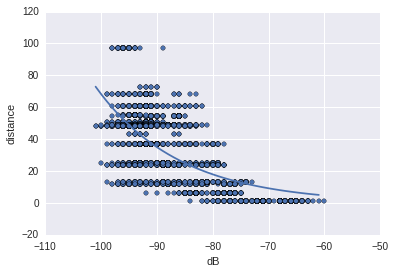

In [188]:
combined.plot(x='dB', y='distance', kind='scatter')
dBs = np.arange(min(dB), max(dB))
plt.plot(dBs, inverse_func(dBs, *inv_parms))

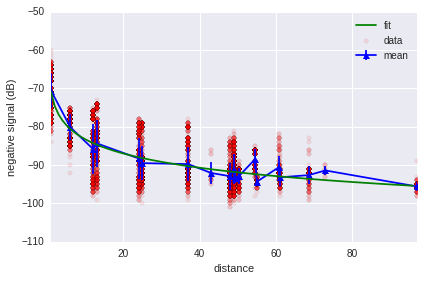

In [189]:
fig = plt.figure()
ax = fig.add_subplot(111)
combined.groupby('distance')['dB'].mean().plot(marker='^', yerr=combined.groupby('distance')['dB'].std(), ax=ax,
                                              label='mean', color='blue')
combined.plot(x='distance', y='dB', kind='scatter', ax=ax, label='data', color='red', alpha=0.1)
plt.ylabel('negative signal (dB)')
ds = np.arange(min(distance), max(distance))
ax.plot(ds, func(ds, *opt_parms), label='fit', color='green')
plt.legend()
plt.tight_layout()

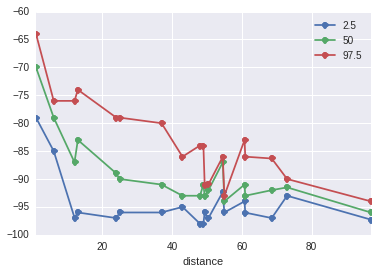

In [190]:
percentiles = pd.DataFrame()
percentiles['2.5'] = combined.groupby('distance')['dB'].quantile(0.025)
percentiles['50'] = combined.groupby('distance')['dB'].quantile(0.5)
percentiles['97.5'] = combined.groupby('distance')['dB'].quantile(0.975)
percentiles.plot(marker='o')

In [191]:
parms_low, _ = sp.optimize.curve_fit(func, xdata=percentiles.index, ydata=percentiles['2.5'])
parms_med, _ = sp.optimize.curve_fit(func, xdata=percentiles.index, ydata=percentiles['50'])
parms_high, _ = sp.optimize.curve_fit(func, xdata=percentiles.index, ydata=percentiles['97.5'])

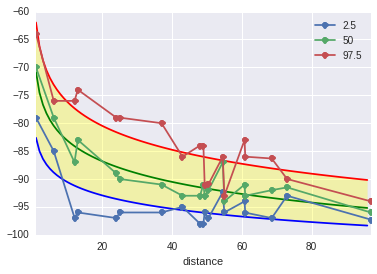

In [192]:
ds = np.arange(min(distance), max(distance))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ds, func(ds, *parms_low), color='blue')
ax.plot(ds, func(ds, *parms_med), color='green')
ax.plot(ds, func(ds, *parms_high), color='red')
ax.fill_between(ds, func(ds, *parms_low), func(ds, *parms_high), color='yellow', alpha=0.3)
percentiles.plot(marker='o', ax=ax)

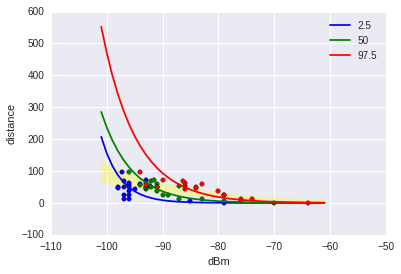

In [208]:
# ds = np.arange(min(distance), max(distance))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dBs, inverse_func(dBs, *parms_low), color='blue', label='2.5')
ax.plot(dBs, inverse_func(dBs, *parms_med), color='green', label='50')
ax.plot(dBs, inverse_func(dBs, *parms_high), color='red', label='97.5')
ax.fill_between(dBs, inverse_func(dBs, *inv_low), inverse_func(dBs, *inv_high), color='yellow', alpha=0.3)
# percentiles.plot(marker='o', ax=ax)
percentiles.reset_index().plot(x='2.5', y='distance', kind='scatter', ax=ax, color='blue')
percentiles.reset_index().plot(x='50', y='distance', kind='scatter', ax=ax, color='green')
percentiles.reset_index().plot(x='97.5', y='distance', kind='scatter', ax=ax, color='red')
ax.set_xlabel('dBm')
ax.set_ylabel('distance')
ax.legend()

In [209]:
inverse_func(-70, *parms_low), inverse_func(-70, *parms_high)

(0.025688965981326271, 3.6769631197148653)

In [210]:
inverse_func(-95, *parms_low), inverse_func(-95, *parms_high)

(36.35455380695285, 209.43302091566349)

# Statistical Triangulation

In [212]:
from shapely.geometry import Point

In [ ]:
# Get 